# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

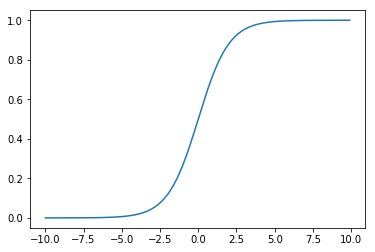

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ、<br>&emsp;&emsp;&emsp;パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>&emsp;&emsp;&emsp;Logistic Sigmoid をアクティベーション関数として<br>&emsp;&emsp;&emsp;持つパーセプトロンを用いて作成せよ。<br><br>&emsp;&emsp;&emsp;パーセプトロンのパラメータの調整には、<br>&emsp;&emsp;&emsp;平均二乗誤差と最急降下法を用いること。<br><br>&emsp;&emsp;&emsp;また、調整済みのパラメータを保存し、<br>&emsp;&emsp;&emsp;作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/perseptorn.png"/>
    <p>パーセプトロン構成図</p>
</td>
<td width="25%">
<img src="images/exp_diff.png"/>
    <p>指数微分の確認</p>
</td>
<td width="25%">
<img src="images/param_a.png"/>
    <p>パラメータa 更新式</p>
</td>
<td width="25%">
<img src="images/param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

**用意するデータ**  
入力データ = np.array([0,0,・・・,0])  # 5000個  
正解データ = np.array([1, 1,・・・・,1])  # 5000個  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  

**※正解データを Z と置く**  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測データ - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  

**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*X_i*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/q4.png" height="100%" width="100%" align="left">

### 入力データ用意

In [3]:
q3_input_data = np.zeros(5000)  # 0の配列
q3_answer = np.ones(5000)  # 1の配列
q3_data = np.stack([q3_input_data, q3_answer],1)

# 学習

誤差 :  0.18109917149760932
誤差 :  0.1704812449225962
誤差 :  0.16065451046505802
誤差 :  0.15156634646120906
誤差 :  0.14316409571516847
誤差 :  0.13539623117159152
誤差 :  0.12821318834356832
誤差 :  0.12156792233486098
誤差 :  0.11541624540121627
誤差 :  0.10971699542465545
誤差 :  0.10443207841859264
誤差 :  0.09952642055968425
誤差 :  0.0949678580483313
誤差 :  0.09072698674487295
誤差 :  0.0867769881648988
誤差 :  0.08309344404448993
誤差 :  0.07965414821921882
誤差 :  0.07643892187299293
誤差 :  0.07342943617459637
誤差 :  0.07060904480260766
誤差 :  0.06796262775346645
誤差 :  0.06547644703876572
誤差 :  0.06313801432927857
誤差 :  0.06093597023565642
誤差 :  0.05885997467930785
誤差 :  0.05690060766699422
誤差 :  0.05504927971086568
誤差 :  0.053298151110858234
誤差 :  0.05164005932425656
誤差 :  0.05006845367552705
誤差 :  0.04857733670116313
誤差 :  0.04716121147276754
誤差 :  0.04581503429347512
誤差 :  0.0445341722151794
誤差 :  0.043314364874646544
誤差 :  0.04215169019560399
誤差 :  0.04104253354875487
誤差 :  0.03998356000380638
誤差 :  0.038971

誤差 :  0.003704538581359595
誤差 :  0.003692453821715656
誤差 :  0.003680445180759031
誤差 :  0.003668511953478447
誤差 :  0.003656653443450195
誤差 :  0.003644868962704217
誤差 :  0.0036331578315994067
誤差 :  0.0036215193787004964
誤差 :  0.003609952940652267
誤差 :  0.003598457862062941
誤差 :  0.003587033495383238
誤差 :  0.003575679200789886
誤差 :  0.0035643943460763024
誤差 :  0.0035531783065335704
誤差 :  0.0035420304648461146
誤差 :  0.003530950210980944
誤差 :  0.003519936942081789
誤差 :  0.003508990062365007
誤差 :  0.0034981089830172407
誤差 :  0.0034872931220937316
誤差 :  0.003476541904419048
誤差 :  0.003465854761490224
誤差 :  0.003455231131381813
誤差 :  0.003444670458651761
誤差 :  0.0034341721942452415
誤差 :  0.0034237357954102505
誤差 :  0.00341336072560231
誤差 :  0.0034030464543985672
誤差 :  0.0033927924574147445
誤差 :  0.0033825982162127644
誤差 :  0.0033724632182250674
誤差 :  0.0033623869566668974
誤差 :  0.003352368930459596
誤差 :  0.0033424086441479145
誤差 :  0.003332505607823911
誤差 :  0.0033226593370478136
誤差 :  0.00331

誤差 :  0.0017945144782469664
誤差 :  0.0017915636255959534
誤差 :  0.0017886222518710088
誤差 :  0.0017856903119852785
誤差 :  0.0017827677611340828
誤差 :  0.0017798545547949925
誤差 :  0.001776950648723738
誤差 :  0.0017740559989534702
誤差 :  0.0017711705617920383
誤差 :  0.0017682942938197904
誤差 :  0.0017654271518876762
誤差 :  0.0017625690931139869
誤差 :  0.0017597200748848858
誤差 :  0.0017568800548498317
誤差 :  0.0017540489909205984
誤差 :  0.0017512268412696352
誤差 :  0.0017484135643267115
誤差 :  0.0017456091187783532
誤差 :  0.0017428134635658879
誤差 :  0.0017400265578818579
誤差 :  0.0017372483611699796
誤差 :  0.0017344788331215511
誤差 :  0.0017317179336762425
誤差 :  0.001728965623016165
誤差 :  0.0017262218615680062
誤差 :  0.0017234866099987102
誤差 :  0.0017207598292150745
誤差 :  0.0017180414803599855
誤差 :  0.0017153315248135275
誤差 :  0.0017126299241879686
誤差 :  0.0017099366403296522
誤差 :  0.0017072516353131585
誤差 :  0.001704574871443092
誤差 :  0.0017019063112506667
誤差 :  0.0016992459174918313
誤差 :  0.001696593653146

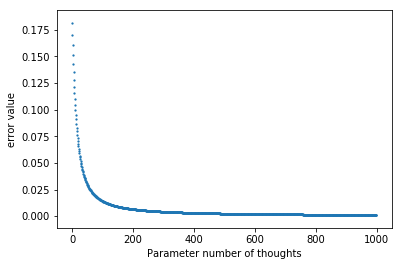

In [16]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b
    

if __name__=='__main__':
    np.random.shuffle(q3_data)  # 入力データをシャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1000):
        if mean_squared_error is not None and mean_squared_error < 0.01:  # 誤差0.01以下になったら終わり
            # 最後のパラメータを保存
            print(a, b)
            parameter["a"].append(a)
            parameter["b"].append(b)
            break
        else:
            y = neuron.input_layer(q3_data[:,0])  # 入力層
            s = neuron.activation_function(y)  # 中間層
            error = neuron.error_function(s, q3_data[:,1])  # 出力層　： 誤差関数

            a, b = neuron.parameter_update(q3_data[:,0], q3_data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
            parameter["a"].append(a)
            parameter["b"].append(b)
            
            print("誤差 : ", error)
            error_list.append(error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1.5)

    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>&emsp;&emsp;正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>&emsp;&emsp;平均 1 分散 0.5 の正規分布に従うとする。<br><br>&emsp;&emsp;この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>&emsp;&emsp;その結果について考察し、必要があれば正解率を改善せよ。

# ----------------------------------------------------------------------
# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

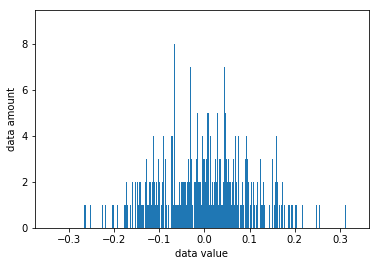

In [5]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

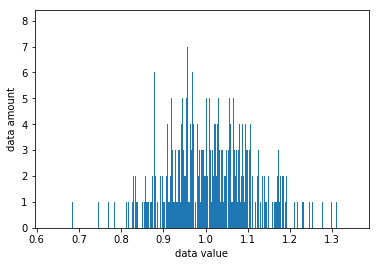

In [6]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

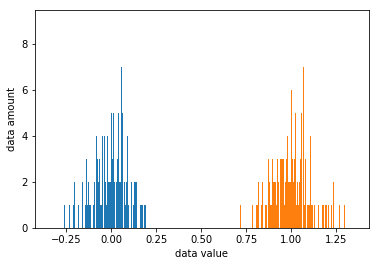

In [7]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [8]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])
input_data

array([0.10327222, 0.07980152, 0.26311372, ..., 0.92868313, 0.9584057 ,
       0.93826711])

### 作成済みデータを保存

In [9]:
# print(type(input_1_data))
# #csvファイルとして保存
# np.savetxt('input_0_data.csv',input_0_data,delimiter=',')
# np.savetxt('input_1_data.csv',input_1_data,delimiter=',')

### 正解データを作る

In [10]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_1, answer_0])  # 1,0配列を横に結合
answer

array([1., 1., 1., ..., 0., 0., 0.])

# 学習

誤差 :  0.32877182558647694
誤差 :  0.32652905521854125
誤差 :  0.32428387496679767
誤差 :  0.3220369940637328
誤差 :  0.31978912811755406
誤差 :  0.3175409977591856
誤差 :  0.31529332725674114
誤差 :  0.3130468431034462
誤差 :  0.3108022725852172
誤差 :  0.30856034233436674
誤差 :  0.3063217768760556
誤差 :  0.3040872971742267
誤差 :  0.30185761918384474
誤差 :  0.2996334524162674
誤差 :  0.2974154985244778
誤差 :  0.29520444991491257
誤差 :  0.2930009883922976
誤差 :  0.290805783843856
誤差 :  0.2886194929688244
誤差 :  0.2864427580590252
誤差 :  0.2842762058357612
誤差 :  0.28212044634798544
誤差 :  0.2799760719361911
誤差 :  0.27784365626598684
誤差 :  0.2757237534349173
誤差 :  0.2736168971553646
誤差 :  0.2715236000160738
誤差 :  0.2694443528240983
誤差 :  0.267379624028515
誤差 :  0.2653298592266848
誤差 :  0.26329548075330206
誤差 :  0.2612768873519354
誤差 :  0.2592744539283134
誤差 :  0.2572885313840264
誤差 :  0.25531944652900845
誤差 :  0.2533675020705845
誤差 :  0.25143297667661657
誤差 :  0.2495161251098296
誤差 :  0.247617178430186
誤差 :  0.2457363

誤差 :  0.05905389404529152
誤差 :  0.058821711084418304
誤差 :  0.05859081973598507
誤差 :  0.058361212759724515
誤差 :  0.058132882947007525
誤差 :  0.05790582312077541
誤差 :  0.057680026135475786
誤差 :  0.0574554848770024
誤差 :  0.05723219226263489
誤差 :  0.057010141240984365
誤差 :  0.056789324791939315
誤差 :  0.05656973592660796
誤差 :  0.05635136768727188
誤差 :  0.056134213147334695
誤差 :  0.05591826541127301
誤差 :  0.05570351761459194
誤差 :  0.055489962923774866
誤差 :  0.05527759453624279
誤差 :  0.0550664056803072
誤差 :  0.054856389615128544
誤差 :  0.05464753963067388
誤差 :  0.054439849047671976
誤差 :  0.05423331121757526
誤差 :  0.05402791952251663
誤差 :  0.053823667375268225
誤差 :  0.05362054821920258
誤差 :  0.05341855552824936
誤差 :  0.053217682806857215
誤差 :  0.053017923589950715
誤差 :  0.052819271442892536
誤差 :  0.05262171996143992
誤差 :  0.05242526277170449
誤差 :  0.05222989353011205
誤差 :  0.05203560592335855
誤差 :  0.05184239366837054
誤差 :  0.05165025051226008
誤差 :  0.05145917023228336
誤差 :  0.051269146635796764

誤差 :  0.02256997731523327
誤差 :  0.02252667611455507
誤差 :  0.02248355266791617
誤差 :  0.022440606014596656
誤差 :  0.022397835199946713
誤差 :  0.022355239275344774
誤差 :  0.022312817298156328
誤差 :  0.02227056833169342
誤差 :  0.02222849144517376
誤差 :  0.022186585713680346
誤差 :  0.022144850218121803
誤差 :  0.022103284045192576
誤差 :  0.022061886287333143
誤差 :  0.022020656042691076
誤差 :  0.021979592415082128
誤差 :  0.021938694513951827
誤差 :  0.021897961454335955
誤差 :  0.021857392356823793
誤差 :  0.02181698634751934
誤差 :  0.021776742558004325
誤差 :  0.021736660125300324
誤差 :  0.021696738191831905
誤差 :  0.021656975905389744
誤差 :  0.021617372419094102
誤差 :  0.021577926891358068
誤差 :  0.02153863848585238
誤差 :  0.02149950637146872
誤差 :  0.021460529722284374
誤差 :  0.021421707717526974
誤差 :  0.021383039541539382
誤差 :  0.021344524383745057
誤差 :  0.021306161438612692
誤差 :  0.02126794990562292
誤差 :  0.02122988898923319
誤差 :  0.02119197789884442
誤差 :  0.02115421584876725
誤差 :  0.021116602058188508
誤差 :  0.02107

誤差 :  0.014161655014930608
誤差 :  0.014147524192152792
誤差 :  0.014133431483420571
誤差 :  0.014119376742685034
誤差 :  0.014105359824604915
誤差 :  0.01409138058454258
誤差 :  0.014077438878558468
最終パラメータ a :  -6.75998781729891
最終パラメータ b :  1.932786342844242
最終誤差:  0.014077438878558468
学習回数 : 1000 回


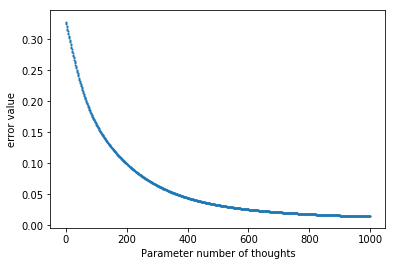

In [17]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()




## Q4の結果について考察し、必要があれば正解率を改善せよ。
## A. 結果としては誤差が収束しており、問題ないが<br>入力層から10回入力の平均をとり入力を安定させる。

In [22]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

    
if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    error_10th_list = []
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}
    input_list = []  # 入力層用
    
    for j in range(10):
        if  j == 0 or j%10 != 0:  
            print("入力 : ", data[:, 0])
            y = neuron.input_layer(data[:,0])  # 入力層
            s = neuron.activation_function(y)  # 中間層
            print("誤差 :", neuron.error_function(s, data[:,1]))
#             error_10th_list(np.mean(neuron.error_function(s, data[:,1])))  # 出力層　： 誤差関数
        else:
            pass
#         print(error_10th_list)
#         a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
#         parameter["a"].append(a)
#         parameter["b"].append(b)

#         print("誤差 : ", error)
#         error_list.append(error)


#     # 更新済みパラメータ保存
#     # print("書き出し parameter : ", parameter)
#     with open('output/output_Q4.json', 'w') as f:
#         json.dump(parameter, f)
            
#     # 描画
#     print("最終パラメータ a : ", parameter["a"][-1])
#     print("最終パラメータ b : ", parameter["b"][-1])
#     print("最終誤差: ", error_list[-1])
#     print("学習回数 : %s 回" % len(error_list))
#     plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
#     plt.xlabel('Parameter number of thoughts')
#     plt.ylabel('error value')
#     plt.show()



入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826711]
誤差 : 0.32877182558647694
入力 :  [0.10327222 0.07980152 0.26311372 ... 0.92868313 0.9584057  0.93826